<h1>Análise Exploratória e Limpeza dos Dados</h1>
<p>Para que possamos realizar uma boa análise do nosso conjunto de dados e, logo em seguida, a limpeza, devemos determinar qual é o nosso objetivo.</p>
<p>Começando pelo enunciado do projeto, temos que o objetivo é criar um modelo que seja capaz de predizer, com base no perfil do cliente e na forma de contato com cliente, se o serviço foi ou não contratado. Para isso, devemos determinar quais as características do cliente são relevantes, ou seja, quais features influenciam no comportamento da target. Posteriormente, poderemos limpar o conjunto de dados e deixá-lo pronto para o treinamento do modelo.</p>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.impute import KNNImputer

In [10]:
df = pd.read_csv('./raw_data/bank_train.csv')
display(df)

,id,age,job,marital,education,location,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,41.0,management,single,tertiary,NaN,no,4522.0,no,no,cellular,28,aug,55,1.0,-1,0.0,unknown,no
1,1,42.0,blue-collar,married,primary,NaN,yes,398.0,yes,n,unknown,16,may,251,4.0,-1,0.0,unknown,no
2,2,26.0,student,single,secondary,Lisboa,no,706.0,no,no,unknown,8,oct,118,1.0,105,2.0,other,no
3,3,54.0,management,married,tertiary,NaN,no,0.0,no,y,cellular,19,nov,307,3.0,-1,0.0,unknown,no
4,4,43.0,self-employed,married,secondary,Porto,no,918.0,yes,no,unknown,6,may,193,1.0,-1,0.0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,39995,43.0,management,married,tertiary,Lisboa,no,13851.0,yes,no,cellular,21,nov,259,1.0,-1,0.0,unknown,no
39996,39996,34.0,blue-collar,married,primary,NaN,no,357.0,yes,no,unknown,14,may,197,2.0,-1,0.0,unknown,no
39997,39997,30.0,management,single,tertiary,NaN,no,4889.0,no,no,cellular,11,aug,545,2.0,-1,0.0,unknown,yes
39998,39998,40.0,self-employed,married,tertiary,Lisboa,no,271.0,yes,no,cellular,21,nov,124,3.0,102,4.0,failure,no


<h2>Breve descrição das features presentes:</h2>
<ul>
    <li><b>id: </b>Número de identificação do cliente</li>
    <li><b>age: </b> Idade do cliente</li>
    <li><b>job: </b>Tipo de emprego do cliente</li>
    <li><b>marital: </b>Estado Civil</li>
    <li><b>education: </b>Grau de Educação</li>
    <li><b>location: </b>Localidade</li>
    <li><b>default: </b>Se o cliente possui crédito de inadimplência</li>
    <li><b>balance: </b>Balanço médio anual, em euros</li>
    <li><b>housing: </b>Se possui ou não empréstimo habitacional</li>
    <li><b>loan: </b>Se possui um empréstimo ativo</li>
    <li><b>contact: </b>Tipo de comunicação realizada (no último contato)</li>
    <li><b>day: </b>Dia do último contato</li>
    <li><b>month: </b>Mês do último contato</li>
    <li><b>duration: </b>Duração do último contato, em minutos</li>
    <li><b>campaign: </b>Número de contatos realizados com o cliente durante a campanha</li>
    <li><b>pdays: </b>Número de dias passados desde o contato com o/a cliente em uma campanha anterior, -1 caso o cliente nunca houvesse sido contatatado</li>
    <li><b>previous: </b>Número de contatos realizados antes desta campanha</li>
    <li><b>poutcome: </b>Resultado da campanha de marketing anterior</li>
    <li><b>(TARGET) y: </b>Contratação ou não do serviço do banco pelo cliente (Sucesso da campanha)</li>
</ul>

<h3>Vejamos algumas informações sobre os formatos dos dados e o número de dados faltantes</h3>
<p>Obs.: Para facilitar a análise, será removida a coluna "id", pois esta é apenas a identificação do cliente</p>

In [11]:
#Remoção da coluna id:
df = df.drop(columns=["id"])

In [12]:
#Visualização da quantidade e tipo dos dados para cada feature:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        38801 non-null  float64
 1   job        38651 non-null  object 
 2   marital    39903 non-null  object 
 3   education  40000 non-null  object 
 4   location   18498 non-null  object 
 5   default    40000 non-null  object 
 6   balance    38208 non-null  float64
 7   housing    40000 non-null  object 
 8   loan       40000 non-null  object 
 9   contact    39266 non-null  object 
 10  day        40000 non-null  int64  
 11  month      40000 non-null  object 
 12  duration   40000 non-null  int64  
 13  campaign   38603 non-null  float64
 14  pdays      40000 non-null  int64  
 15  previous   39703 non-null  float64
 16  poutcome   40000 non-null  object 
 17  y          40000 non-null  object 
dtypes: float64(4), int64(3), object(11)
memory usage: 5.5+ MB


In [13]:
#Visualização de valores únicos para cada feature:
for col in df.columns:
  print(col.upper())
  print(df[col].unique(), df[col].dtype, "\n")

AGE
[ 41.  42.  26.  54.  43.  34.  40.  45.  51.  21.  32.  60.  47.  46.
  31.  53.  27.  29.  35.  36.  nan  25.  37.  50.  77.  57.  30.  58.
  33.  44.  48.  55.  61.  84.  28.  39.  63.  59.  38.  70.  56.  65.
  49.  22.  71.  52.  74.  23.  24.  64.  19.  78.  62.  73.  69.  67.
  66.  80.  68.  86.   8. 150.  72.  76.  83.  75.  20.  85.  82.  79.
  87.  81.  18.  95.  88.  89.  90.  92.  94.  93.] float64 

JOB
['management' 'blue-collar' 'student' 'self-employed' 'technician'
 'administrator' 'retired' 'housemaid' 'services' 'unemployed' nan
 'admin.' 'unknown' 'entrepreneur'] object 

MARITAL
['single' 'married' 'divorced' nan] object 

EDUCATION
['tertiary' 'primary' 'secondary' 'unknown'] object 

LOCATION
[nan 'Lisboa' 'Porto' 'Amadora' 'Braga' 'Coimbra' 'Faro'] object 

DEFAULT
['no' 'yes'] object 

BALANCE
[ 4522.   398.   706. ...  4820. 13851.  4889.] float64 

HOUSING
['no' 'yes'] object 

LOAN
['no' 'n' 'y' 'yes'] object 

CONTACT
['cellular' 'unknown' nan 'telepho

<p>Na saída acima, vemos a presença de dados "unknown". Neste projeto, consideramos "unknown" como dado faltante, pois este não representa de fato uma informação assim como um dado faltante.</p>

In [16]:
#Substituição dos dados "unknown" por dado faltante:
df = df.replace("unknown", np.nan)

In [17]:
#Visualização de dados faltantes em cada feature:
df.isna().sum()

age           1199
job           1588
marital         97
education     1639
location     21502
default          0
balance       1792
housing          0
loan             0
contact      12052
day              0
month            0
duration         0
campaign      1397
pdays            0
previous       297
poutcome     32662
y                0
dtype: int64

<p>Rapidamente, observamos que há muitos dados faltantes nas features "location" e "poutcome". Essas duas colunas podem representar dados inutilizáveis. Antes de excluí-los, contudo, analisemos os seguintes dados com os seguintes gráficos a fim de identificar relações com a target.</p>

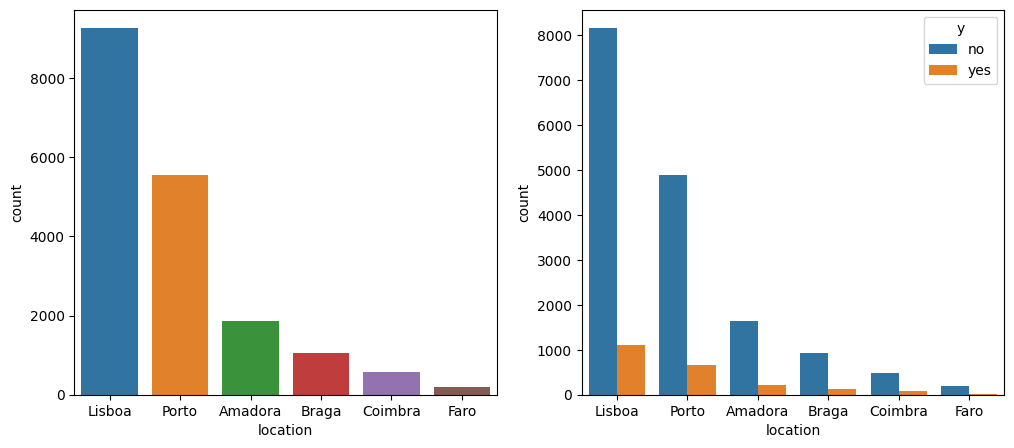

In [18]:
#Apresentação do gráfico de barras com relação a localização:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.countplot(data = df, x = "location")
plt.subplot(1,2,2)
sns.countplot(data = df, x = "location", hue = "y")
plt.show()

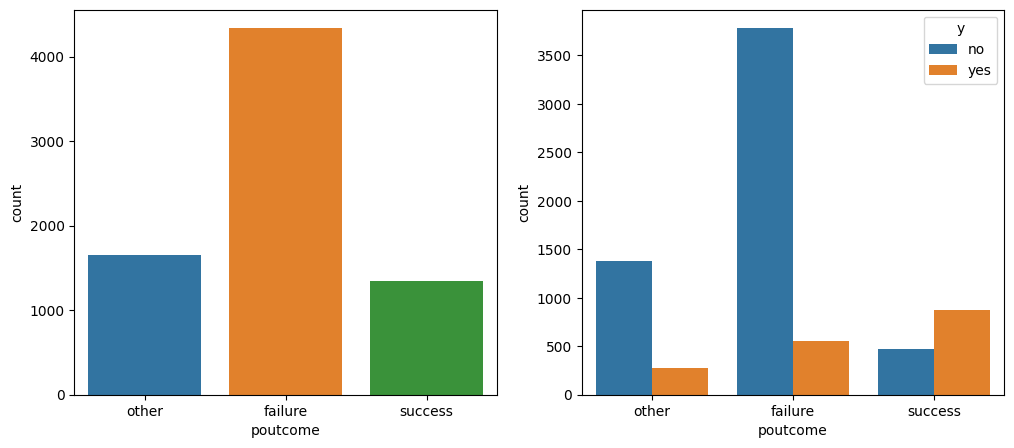

In [19]:
#Apresentação do gráfico de barras com relação ao poutcome:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.countplot(data = df, x = "poutcome")
plt.subplot(1,2,2)
sns.countplot(data = df, x = "poutcome", hue = "y")
plt.show()

<p>Vejamos agora estes dados em porcentagem para ver se realmente apresentam relevância.</p>

<Figure size 809x500 with 0 Axes>

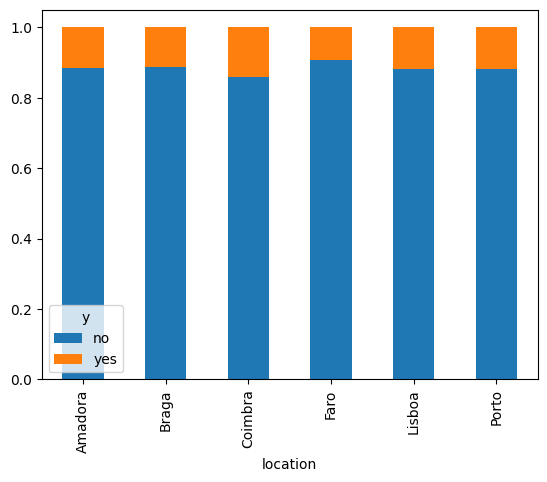

In [21]:
# Apresentação do gráfico percentil em barras da localização em relação ao y:
plt.figure(figsize = (8.09,5))
(df.groupby('location')['y'].value_counts(normalize=True)
   .unstack('y').plot.bar(stacked=True)
)
plt.show()

<Figure size 809x500 with 0 Axes>

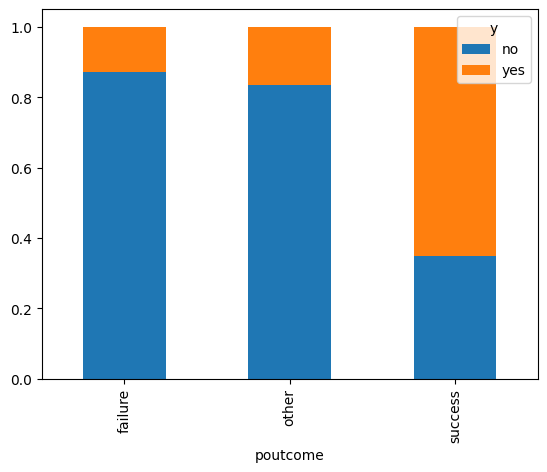

In [22]:
# Apresentação do gráfico percentil em barras da localização em relação ao y:
plt.figure(figsize = (8.09,5))
(df.groupby('poutcome')['y'].value_counts(normalize=True)
   .unstack('y').plot.bar(stacked=True)
)
plt.show()

<p>No caso da localização, temos que a variável target é independente da localização, pois os casos afirmativos, ou seja, "y" = yes não ultrapassam os 20%. Já no caso do poutcome, nos deparamos com um problema: este apresenta um grande correlação com a target, o que é evidenciado pela disparidade entre os casos de sucesso da campanha anterior e os demais casos. Contudo, temos uma grande falta de dados para essa feature.</p>